In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
data1 = pd.read_csv("bib.csv",header=None,sep=' ')
data1.columns = ['num', 'word']

In [30]:
data1['num'] /= data1['num'].sum()
data1.loc[:10,['num']]

,num
0,0.031295
1,0.026844
2,0.023085
3,0.021221
4,0.020894
5,0.014747
6,0.014085
7,0.010683
8,0.010607
9,0.009647


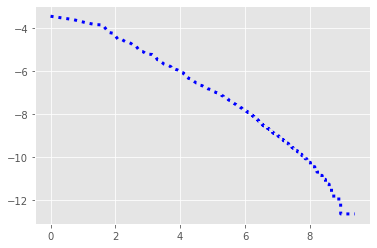

In [31]:
# see the relationship of rank and p
# zipf's law
x = np.arange(data1.shape[0])+1
y = data1['num']
# plt.plot(x , y)
plt.plot(np.log(x), np.log(y), 'b:', linewidth=3)
plt.show()

In [32]:
data2 = pd.read_csv("bib.csv",header=None,sep=' ')
data2.columns = ['num', 'word']
data2[:10]

,num,word
0,9872,and
1,8468,shall
2,7282,lord
3,6694,i
4,6591,unto
5,4652,thou
6,4443,thi
7,3370,thee
8,3346,god
9,3043,son


In [33]:
# get the first digit of the number
data2 = data2['num'].astype(str).str[:1]
count = data2.value_counts()
count

1    5863
2    2108
3    1175
4     789
5     622
6     434
7     374
8     296
9     292
Name: num, dtype: int64

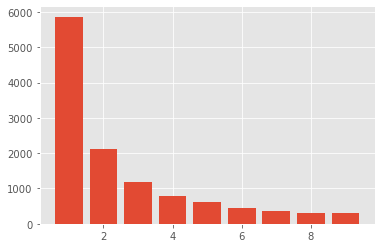

In [34]:
# see the benford's law
x = np.arange(9)+1
plt.bar(x, count)
plt.show()

In [35]:
# benford's law neglecting the 1 digit frequencies(frequency less than 10)
data3 = pd.read_csv("bib.csv",header=None,sep=' ')
data3.columns = ['num', 'word']
data3.shape

(11953, 2)

In [36]:
data3 = data3[data3['num']>9]
data3.shape

(3222, 2)

In [37]:
# get the first digit of the number
data3 = data3['num'].astype(str).str[:1]
count = data3.value_counts()
count

1    1598
2     633
3     361
4     211
5     152
6      90
7      67
8      62
9      48
Name: num, dtype: int64

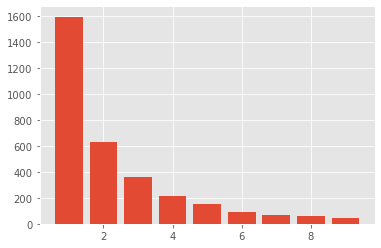

In [38]:
# see the benford's law
x = np.arange(9)+1
plt.bar(x, count)
plt.show()

In [39]:
# heap's law
n = 0
v = 0
step_n = []
step_v = []
dic = {}
# read text term by term
with open("bib_preprocess.txt", 'r') as f:
    for line in f:
        for word in line.split():
            n += 1
            if hash(word) not in dic:
                dic[hash(word)] = word
                v += 1
            step_n.append(n)
            step_v.append(v)
            

In [40]:
step_v[-1]

11953

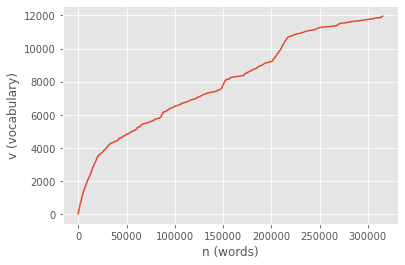

In [41]:
plt.plot(step_n,step_v)
plt.xlabel("n (words)")
plt.ylabel("v (vocabulary)")
plt.show()

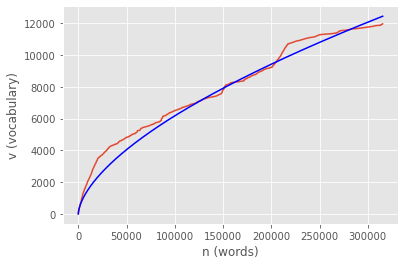

In [46]:
# fit the v(n) = k * n^b, typically 0.4 < b < 0.7
k = 5.5
b = 0.61
plt.plot(step_n, step_v, label="data")
plt.plot(step_n, k*(np.array(step_n)**b), 'b-', label="fit")
plt.xlabel("n (words)")
plt.ylabel("v (vocabulary)")
plt.show()